In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
#Raw data obtain from https://data.gov.sg/dataset/resale-flat-prices
df = pd.read_csv(r'C:\Users\fookfatt91\Downloads\resale_flat_prices.csv')

In [45]:
#Let's look at the data
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44,Improved,1979,61 years 04 months,232000
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67,New Generation,1978,60 years 07 months,250000
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67,New Generation,1980,62 years 05 months,262000
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68,New Generation,1980,62 years 01 month,265000
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67,New Generation,1980,62 years 05 months,265000


# Data Cleaning

In [27]:
#Let's see if there is any missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))

month - 0.0%
town - 0.0%
flat_type - 0.0%
block - 0.0%
street_name - 0.0%
storey_range - 0.0%
floor_area_sqm - 0.0%
flat_model - 0.0%
lease_commence_date - 0.0%
remaining_lease - 0.0%
resale_price - 0.0%


In [78]:
# Check the data type of columns
df.dtypes

month                  object
town                   object
flat_type              object
block                  object
street_name            object
storey_range           object
floor_area_sqm          int64
flat_model             object
lease_commence_date     int64
remaining_lease        object
resale_price            int64
year                    int64
dtype: object

In [87]:
#change data type of columns
df['floor_area_sqm'] = df['floor_area_sqm'].astype('int64')
df['resale_price'] = df['resale_price'].astype('int64')
df['remaining_lease_year'] = df['remaining_lease'].astype('str').str[:2].astype('int64')
df['year'] = df['month'].astype('str').str[:4].astype('int64') #create new column ' year'

In [88]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,year,remaining_lease_year
0,0,0,1,1064,12,3,44,4,1979,201,232000,0,20
1,0,0,2,35,15,0,67,11,1978,192,250000,0,19
2,0,0,2,1626,16,0,67,11,1980,214,262000,0,21
3,0,0,2,1238,12,1,68,11,1980,210,265000,0,21
4,0,0,2,1621,16,0,67,11,1980,214,265000,0,21


In [101]:
#take a look at the most expensive hdb sold
df.sort_values(by=['resale_price'],inplace=False,ascending=False).head(10)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,year,remaining_lease_year
100046,53,14,2,1032,218,0,210,17,1972,66,1268000,53,66
78466,44,7,4,348,100,14,107,19,2011,538,1258000,44,53
94955,51,2,4,616,54,10,120,3,2011,539,1250000,51,53
83335,46,7,4,347,100,16,105,19,2011,537,1248000,46,53
99233,53,2,4,615,54,8,120,3,2011,537,1238800,53,53
100513,53,18,5,163,314,3,148,2,1995,347,1235000,53,34
68305,38,7,4,348,100,13,107,19,2011,545,1232000,38,54
92503,50,2,4,616,54,9,120,3,2011,540,1220000,50,54
85391,47,2,4,616,54,8,120,3,2011,543,1218888,47,54
98314,52,18,4,308,191,11,117,4,2012,551,1210000,52,55


In [52]:
#to look at all the data
pd.set_option('display.max_rows', None)

# Finding correlation in data

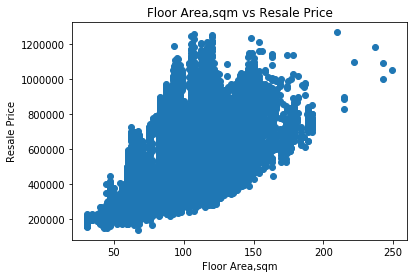

In [60]:
#scatter plot with floor area vs resale price using matplotlib
plt.scatter(x=df['floor_area_sqm'],y=df['resale_price'])
plt.title('Floor Area,sqm vs Resale Price')
plt.xlabel('Floor Area,sqm')
plt.ylabel('Resale Price')
plt.show()

Text(0.5, 1.0, 'Floor Area,sqm vs Resale Price')

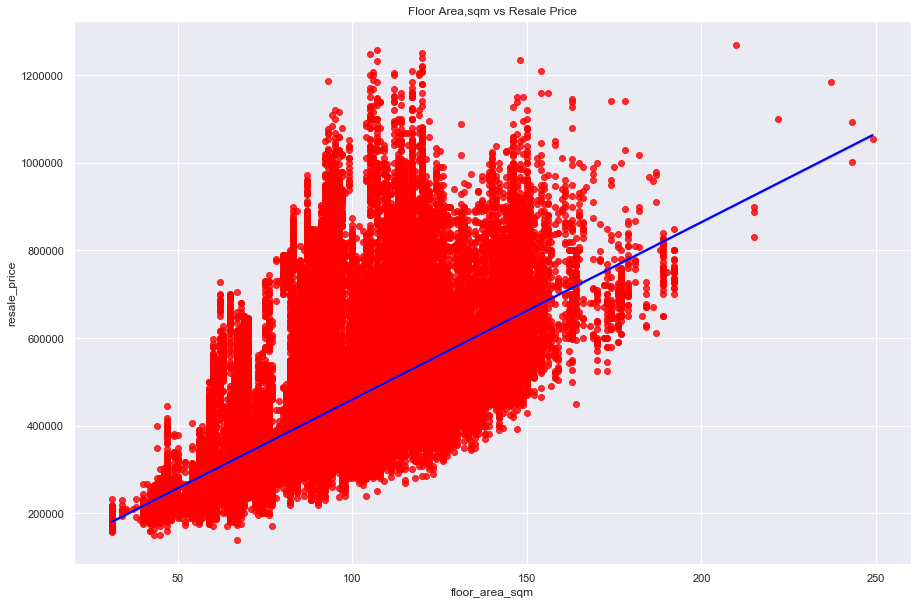

In [102]:
#plot with seaborn with correlation line
sns.regplot(data=df,x='floor_area_sqm',y='resale_price',scatter_kws={"color":"red"},line_kws={"color":"blue"})
plt.title('Floor Area,sqm vs Resale Price')

In [75]:
# 3 type of correlation methods pearson,kendall,spearman
df.corr(method='kendall')

,floor_area_sqm,lease_commence_date,resale_price
floor_area_sqm,1.000000,0.128726,0.509755
lease_commence_date,0.128726,1.000000,0.275452
resale_price,0.509755,0.275452,1.000000


In [79]:
df.corr() #default = pearson

,floor_area_sqm,lease_commence_date,resale_price,year
floor_area_sqm,1.000000,0.162022,0.626038,-0.001058
lease_commence_date,0.162022,1.000000,0.341099,0.119854
resale_price,0.626038,0.341099,1.000000,0.090840
year,-0.001058,0.119854,0.090840,1.000000


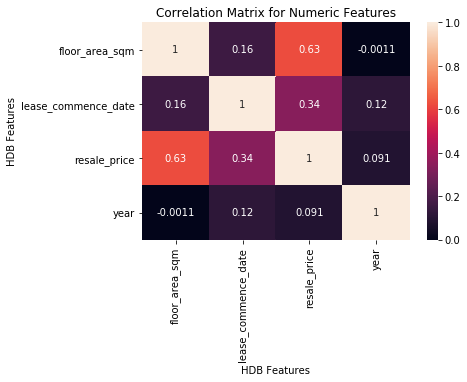

In [80]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix,annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('HDB Features')
plt.ylabel('HDB Features')
plt.show()

In [90]:
#numerized features in other column to find correlation
df_numerized = df
for col_name in df_numerized.columns:
    if (df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

In [91]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,year,remaining_lease_year
0,0,0,1,1064,12,3,44,4,1979,201,232000,0,20
1,0,0,2,35,15,0,67,11,1978,192,250000,0,19
2,0,0,2,1626,16,0,67,11,1980,214,262000,0,21
3,0,0,2,1238,12,1,68,11,1980,210,265000,0,21
4,0,0,2,1621,16,0,67,11,1980,214,265000,0,21


In [93]:
df_numerized.sort_values(by='resale_price',ascending=False).head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,year,remaining_lease_year
100046,53,14,2,1032,218,0,210,17,1972,66,1268000,53,66
78466,44,7,4,348,100,14,107,19,2011,538,1258000,44,53
94955,51,2,4,616,54,10,120,3,2011,539,1250000,51,53
83335,46,7,4,347,100,16,105,19,2011,537,1248000,46,53
99233,53,2,4,615,54,8,120,3,2011,537,1238800,53,53


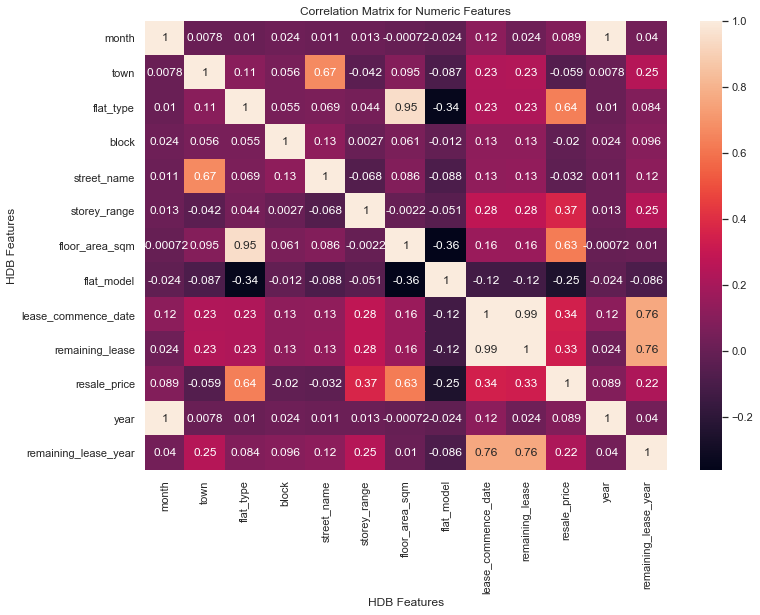

In [95]:
numerized_correlation_matrix = df_numerized.corr()
sns.heatmap(numerized_correlation_matrix,annot=True)
sns.set(rc={'figure.figsize':(15,10)})
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('HDB Features')
plt.ylabel('HDB Features')
plt.show()

In [97]:
#unstack for better visualization

correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

month                 month                   1.000000
                      town                    0.007824
                      flat_type               0.010359
                      block                   0.024129
                      street_name             0.010974
                      storey_range            0.012735
                      floor_area_sqm         -0.000717
                      flat_model             -0.024165
                      lease_commence_date     0.121777
                      remaining_lease         0.023562
                      resale_price            0.088793
                      year                    1.000000
                      remaining_lease_year    0.039798
town                  month                   0.007824
                      town                    1.000000
                      flat_type               0.106758
                      block                   0.056029
                      street_name             0.668028
          

In [99]:
sorted_pairs = corr_pairs.sort_values(ascending=False)
sorted_pairs

remaining_lease_year  remaining_lease_year    1.000000
year                  year                    1.000000
month                 year                    1.000000
town                  town                    1.000000
flat_type             flat_type               1.000000
block                 block                   1.000000
street_name           street_name             1.000000
storey_range          storey_range            1.000000
flat_model            flat_model              1.000000
lease_commence_date   lease_commence_date     1.000000
remaining_lease       remaining_lease         1.000000
resale_price          resale_price            1.000000
year                  month                   1.000000
floor_area_sqm        floor_area_sqm          1.000000
month                 month                   1.000000
lease_commence_date   remaining_lease         0.994912
remaining_lease       lease_commence_date     0.994912
floor_area_sqm        flat_type               0.950839
flat_type 

# Visualize resale hdb price trend

In [4]:
hdb.town.unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL',
       'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
       'TOA PAYOH', 'WOODLANDS', 'YISHUN'], dtype=object)

In [5]:
hdb.flat_type.unique()

array(['2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', '1 ROOM',
       'MULTI-GENERATION'], dtype=object)

# To plot a line graph to visualize recent increase in HDB prices

<b>town available</b>

['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL',
       'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
       'TOA PAYOH', 'WOODLANDS', 'YISHUN']

<b>flat_type</b>

['2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', '1 ROOM','MULTI-GENERATION']

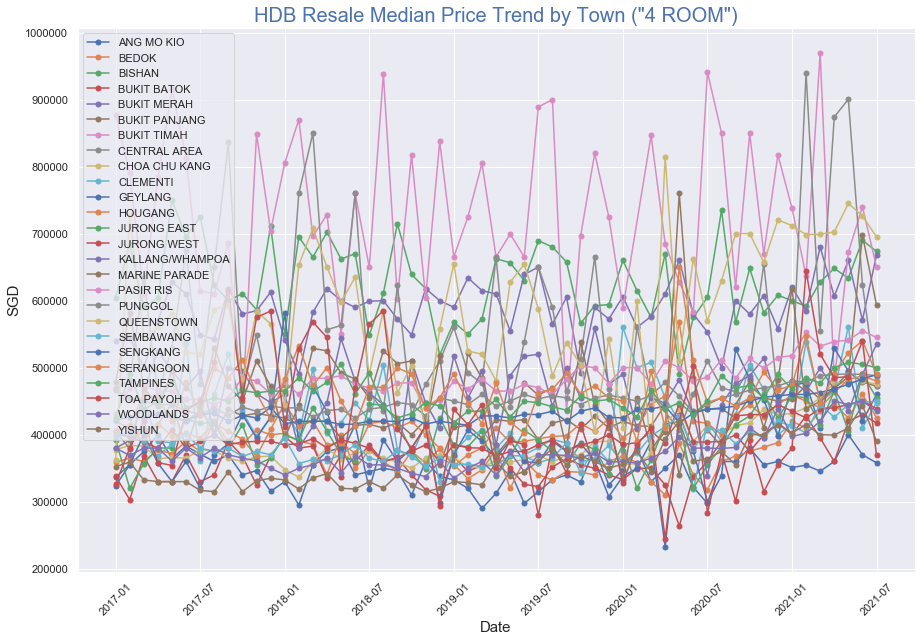

In [111]:
#to plot charts of median price from all town
for town in hdb.town.unique():
    town_filtered = hdb.loc[(hdb.town == town)][['month','resale_price']]
    townn_median = town_filtered.groupby('month').median()
    plt.plot(townn_median.index,townn_median.resale_price,marker='.',markersize = 10, linestyle='-',label=town)

plt.xticks(townn_median.index[::6],rotation=45)
plt.title('HDB Resale Median Price Trend by Town ("4 ROOM")',fontsize='20',color='b')
plt.xlabel('Date',fontsize='15')
plt.ylabel('SGD',fontsize='15')
ax = plt.gca()
ax.grid(True)
plt.legend()
plt.show()

# Visualize trend chart with filters
## town, room type, remaining lease

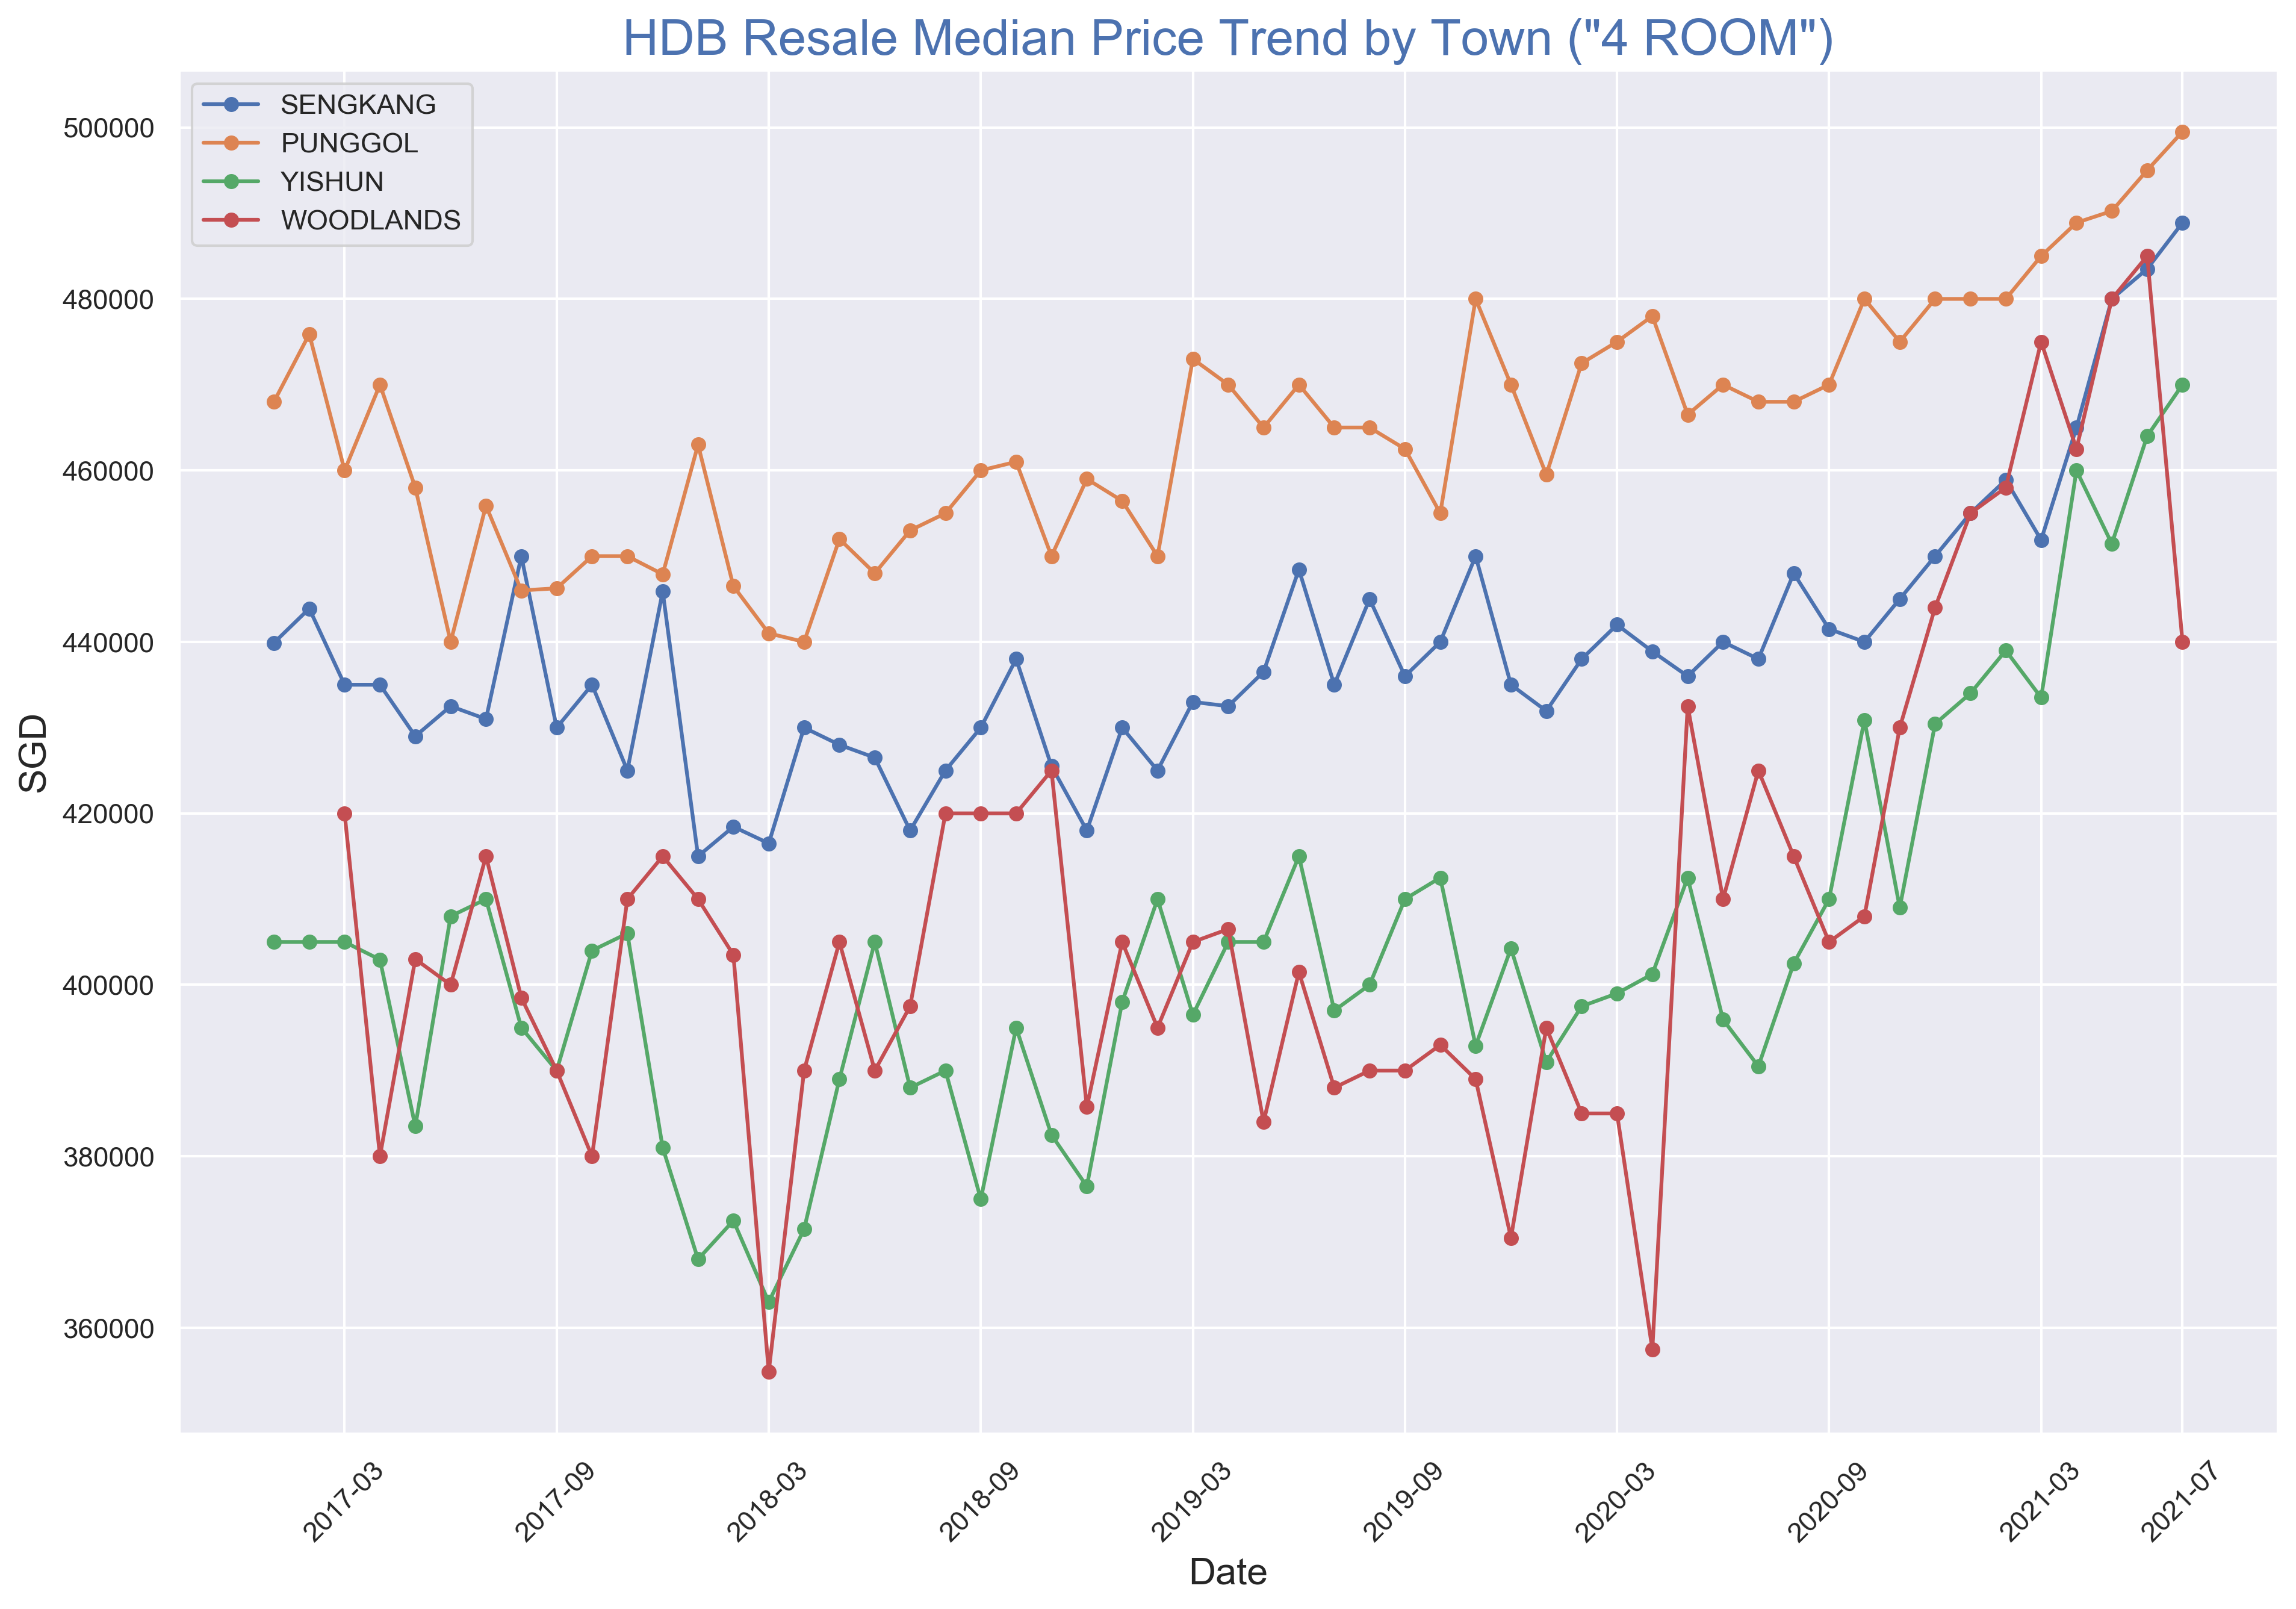

In [112]:
#filter
towns = ['SENGKANG','PUNGGOL','YISHUN','WOODLANDS']
rooms = ('4 ROOM')
min_lease_commense_date = 2004 #new variable to limit maximum age of the unit

plt.figure(figsize=[15,10],dpi=300)

for town in towns:
    town_filtered = hdb.loc[(hdb.town == town)&(hdb.flat_type == rooms)&(hdb.lease_commence_date > min_lease_commense_date)][['month','resale_price']]
    townn_median = town_filtered.groupby('month').median()
    plt.plot(townn_median.index,townn_median.resale_price,marker='.',markersize = 10, linestyle='-',label=town)

plt.xticks(townn_median.index[::6].tolist()+['2021-07'],rotation=45)
plt.title('HDB Resale Median Price Trend by Town ("4 ROOM")',fontsize='20',color='b')
plt.xlabel('Date',fontsize='15')
plt.ylabel('SGD',fontsize='15')
ax = plt.gca()
ax.grid(True)
plt.legend()
plt.show()